<a href="https://colab.research.google.com/github/Angsumi/Cholera-CADD/blob/main/New_drug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install chembl_webresource_client



     |████████████████████████████████| 61kB 4.1MB/s 
  Created wheel for chembl-webresource-client: filename=chembl_webresource_client-0.10.2-cp36-none-any.whl size=55663 sha256=b23fe96fc608a2bcffc25e223cdc99972841408a7bebb279a49a07f929a22502
  Stored in directory: /root/.cache/pip/wheels/e6/96/19/3f042bfda7c669bfe24c8278477f57b0fbbf3e488b4c09e3a8
Successfully built chembl-webresource-client


In [ ]:
from chembl_webresource_client.new_client import new_client
import pandas as pd

In [ ]:
target = new_client.target
target_query = target.search('Cholera')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Vibrio cholerae,Vibrio cholerae,8.0,False,CHEMBL614402,[],ORGANISM,666
1,[],Vibrio cholerae serotype O1 (strain ATCC 39315...,CAI-1 autoinducer sensor kinase/phosphatase CqsS,8.0,False,CHEMBL1921662,"[{'accession': 'Q9KM66', 'component_descriptio...",SINGLE PROTEIN,243277


In [ ]:
ac=new_client.activity


In [ ]:
activity = ac.filter(chembl_id='CHEMBL1921662').filter(standard_type='IC50')[1:1000]

In [ ]:
ok=pd.DataFrame(activity)

In [ ]:
columns=['molecule_chembl_id', 'canonical_smiles', 'standard_value']
activity_data = pd.DataFrame(ok, columns=columns)

In [ ]:
activity_data.head(2)

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL324340,Cc1ccc2oc(-c3cccc(N4C(=O)c5ccc(C(=O)O)cc5C4=O)...,2500.0
1,CHEMBL324340,Cc1ccc2oc(-c3cccc(N4C(=O)c5ccc(C(=O)O)cc5C4=O)...,50000.0


In [ ]:
activity_data.dropna(inplace=True)
activity_data.shape
activity_data.reset_index(drop=True,inplace=True)

In [ ]:
activity_class=[]
number=0
for i in activity_data.standard_value:
  number += 1
  if float(i)<1000:
    activity_class.append('active')
  elif float(i)>1000 and float(i)<10000:
    activity_class.append('intermediate')
  else:
    activity_class.append('inactive')
number

972

In [ ]:
data1 = pd.concat([activity_data, pd.Series(activity_class)], axis=1)

In [ ]:
data1

,molecule_chembl_id,canonical_smiles,standard_value,0
0,CHEMBL324340,Cc1ccc2oc(-c3cccc(N4C(=O)c5ccc(C(=O)O)cc5C4=O)...,2500.0,intermediate
1,CHEMBL324340,Cc1ccc2oc(-c3cccc(N4C(=O)c5ccc(C(=O)O)cc5C4=O)...,50000.0,inactive
2,CHEMBL109600,COc1ccccc1-c1ccc2oc(-c3ccc(OC)c(N4C(=O)c5ccc(C...,9000.0,intermediate
3,CHEMBL357278,Cc1nc2cc(OC[C@H](O)CN3CCN(CC(=O)Nc4ccc(Cl)c(C(...,4000.0,intermediate
4,CHEMBL357119,Cc1nc2cc(OC[C@H](O)CN3CCN(CC(=O)NCCc4ccccc4)CC...,17000.0,inactive
...,...,...,...,...
967,CHEMBL87187,Nc1cccc(-c2ccc(CCN3CCN(c4cccc5cccnc45)CC3)cc2)n1,130.0,active
968,CHEMBL87187,Nc1cccc(-c2ccc(CCN3CCN(c4cccc5cccnc45)CC3)cc2)n1,212.0,active
969,CHEMBL87187,Nc1cccc(-c2ccc(CCN3CCN(c4cccc5cccnc45)CC3)cc2)n1,825.0,active
970,CHEMBL62565,c1cnc(N2CCN(Cc3cccc4c3sc3ccccc34)CC2)nc1,100.0,active


In [ ]:
data.to_csv('Activity_data_final.csv')

NameError: ignored

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [ ]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [ ]:
ok=lipinski(data1.canonical_smiles)
ok.tail(3)

,MW,LogP,NumHDonors,NumHAcceptors
969,409.537,4.2437,1.0,5.0
970,360.486,4.1667,0.0,5.0
971,354.362,2.4778,2.0,4.0


In [ ]:
grouped_data = pd.concat([data1, ok], axis=1)

In [ ]:
grouped_data

,molecule_chembl_id,canonical_smiles,standard_value,0,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL324340,Cc1ccc2oc(-c3cccc(N4C(=O)c5ccc(C(=O)O)cc5C4=O)...,2500.0,intermediate,398.374,4.30202,1.0,5.0
1,CHEMBL324340,Cc1ccc2oc(-c3cccc(N4C(=O)c5ccc(C(=O)O)cc5C4=O)...,50000.0,inactive,398.374,4.30202,1.0,5.0
2,CHEMBL109600,COc1ccccc1-c1ccc2oc(-c3ccc(OC)c(N4C(=O)c5ccc(C...,9000.0,intermediate,520.497,5.67780,1.0,7.0
3,CHEMBL357278,Cc1nc2cc(OC[C@H](O)CN3CCN(CC(=O)Nc4ccc(Cl)c(C(...,4000.0,intermediate,543.011,4.27292,2.0,7.0
4,CHEMBL357119,Cc1nc2cc(OC[C@H](O)CN3CCN(CC(=O)NCCc4ccccc4)CC...,17000.0,inactive,468.623,2.32092,2.0,7.0
...,...,...,...,...,...,...,...,...
967,CHEMBL87187,Nc1cccc(-c2ccc(CCN3CCN(c4cccc5cccnc45)CC3)cc2)n1,130.0,active,409.537,4.24370,1.0,5.0
968,CHEMBL87187,Nc1cccc(-c2ccc(CCN3CCN(c4cccc5cccnc45)CC3)cc2)n1,212.0,active,409.537,4.24370,1.0,5.0
969,CHEMBL87187,Nc1cccc(-c2ccc(CCN3CCN(c4cccc5cccnc45)CC3)cc2)n1,825.0,active,409.537,4.24370,1.0,5.0
970,CHEMBL62565,c1cnc(N2CCN(Cc3cccc4c3sc3ccccc34)CC2)nc1,100.0,active,360.486,4.16670,0.0,5.0


In [ ]:

def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if float(i) > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [ ]:
norm_value(grouped_data)

,molecule_chembl_id,canonical_smiles,0,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL324340,Cc1ccc2oc(-c3cccc(N4C(=O)c5ccc(C(=O)O)cc5C4=O)...,intermediate,398.374,4.30202,1.0,5.0,2500.0
1,CHEMBL324340,Cc1ccc2oc(-c3cccc(N4C(=O)c5ccc(C(=O)O)cc5C4=O)...,inactive,398.374,4.30202,1.0,5.0,50000.0
2,CHEMBL109600,COc1ccccc1-c1ccc2oc(-c3ccc(OC)c(N4C(=O)c5ccc(C...,intermediate,520.497,5.67780,1.0,7.0,9000.0
3,CHEMBL357278,Cc1nc2cc(OC[C@H](O)CN3CCN(CC(=O)Nc4ccc(Cl)c(C(...,intermediate,543.011,4.27292,2.0,7.0,4000.0
4,CHEMBL357119,Cc1nc2cc(OC[C@H](O)CN3CCN(CC(=O)NCCc4ccccc4)CC...,inactive,468.623,2.32092,2.0,7.0,17000.0
...,...,...,...,...,...,...,...,...
967,CHEMBL87187,Nc1cccc(-c2ccc(CCN3CCN(c4cccc5cccnc45)CC3)cc2)n1,active,409.537,4.24370,1.0,5.0,130.0
968,CHEMBL87187,Nc1cccc(-c2ccc(CCN3CCN(c4cccc5cccnc45)CC3)cc2)n1,active,409.537,4.24370,1.0,5.0,212.0
969,CHEMBL87187,Nc1cccc(-c2ccc(CCN3CCN(c4cccc5cccnc45)CC3)cc2)n1,active,409.537,4.24370,1.0,5.0,825.0
970,CHEMBL62565,c1cnc(N2CCN(Cc3cccc4c3sc3ccccc34)CC2)nc1,active,360.486,4.16670,0.0,5.0,100.0


In [ ]:
a=[]
for i in data1['standard_value']:
    a.append(float(i))
sum(a)/len(a)

2667621.103321869

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt


In [ ]:
grouped_data['bioactivity_class']= grouped_data[0]

In [ ]:
plt.figure(figsize=(5.5, 5.5))
sb.countplot(x='bioactivity_class', data=grouped_data, edgecolor='black')

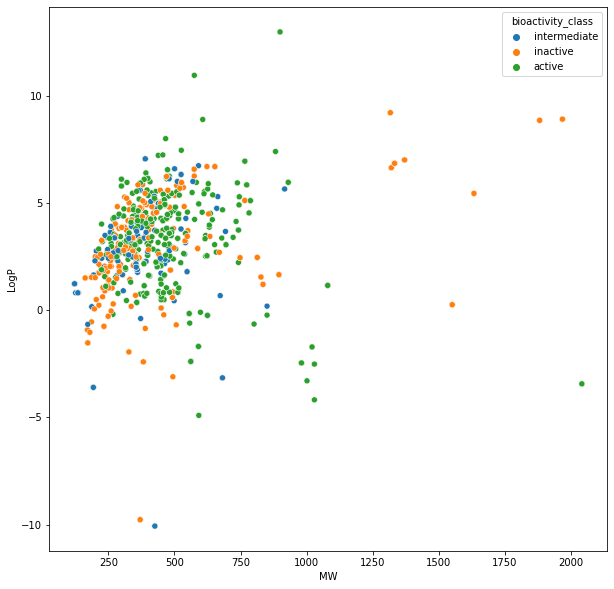

In [ ]:
plt.figure(figsize=(10,10))
sb.scatterplot(data=grouped_data,x='MW',y='LogP',hue='bioactivity_class')
plt.savefig('scatter.pdf')

In [ ]:
grouped_data['standard_value_norm']=pd.to_numeric(grouped_data['standard_value_norm'])
grouped_data['standard_value_norm']=np.log10(grouped_data['standard_value_norm'])


In [ ]:
plt.figure(figsize=(5.5, 5.5))
sb.boxplot(x = 'bioactivity_class', y = 'standard_value_norm', data = grouped_data)


In [ ]:
sb.heatmap(grouped_data.corr())
plt.savefig('kibakibi.pdf')

In [ ]:
plt.figure(figsize=(5.5, 5.5))
sb.boxplot(x = 'bioactivity_class', y = 'MW', data = grouped_data)
plt.savefig('class&MW.png')

In [ ]:
plt.figure(figsize=(5.5, 5.5))
sb.boxplot(x = 'bioactivity_class', y = 'LogP', data = grouped_data)
plt.savefig('class&LogP.png')

In [ ]:
plt.figure(figsize=(5.5, 5.5))
sb.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = grouped_data)
plt.savefig('class&HDonor.png')

In [ ]:
plt.figure(figsize=(5.5, 5.5))
sb.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = grouped_data)
plt.savefig('class&HAcceptor.png')

In [ ]:
def mannwhitney(descriptor,df_2class, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  

  return results

In [ ]:
a=mannwhitney('MW', grouped_data)
b=mannwhitney('LogP', grouped_data)
c=mannwhitney('NumHDonors', grouped_data)
d=mannwhitney('NumHAcceptors', grouped_data)
e=mannwhitney('standard_value_norm', grouped_data)

In [ ]:
Whittney_test = pd.concat([a,b,c,d,e], axis=0)

In [ ]:
Whittney_test.to_csv('Whittney_test_results.csv')

In [ ]:
! zip -r results.zip . -i *.csv *.pdf *.png